In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./exam1_output.csv")
df.head()

,X,Y
0,-2.70,-1.412905
1,-2.69,-1.406451
2,-2.68,-1.394499
3,-2.67,-1.377167
4,-2.66,-1.354600


In [3]:
X = df[["X"]]
y = df["Y"]

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
class Polynomial:
    def __init__(self, X, y, degree):
        self.X = X
        self.y = y

        self.degree = degree

        self.poly = PolynomialFeatures(self.degree)
        self.X_poly = self.poly.fit_transform(self.X)

        self.model = LinearRegression()
        print(f"Build Successed. n = {self.degree}")

    def getFit(self):
        self.model.fit(self.X_poly, self.y)
        return self.model
    
    def getPredict(self):
        self.predict = self.model.predict(self.X_poly)
        return self.predict

    def getScore(self):
        self.score = self.model.score(self.X_poly, self.y)
        print(self.score)
        return self.score

    def getCoef(self):
        return self.model.coef_

    def getIntercept(self):
        return self.model.intercept_

In [6]:
# Find the best degree
# for i in range(10, 21, 1):
#     my_model = Polynomial(X, y, i)
#     my_model.getFit()

#     predict = my_model.getPredict()

#     my_model.getScore()

#     plt.plot(X, predict-1)
#     plt.plot(X, y)
#     plt.show()

Build Successed. n = 12
0.5074043324128212


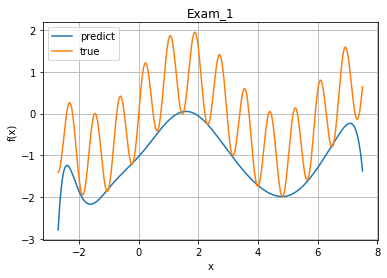

In [7]:
my_model = Polynomial(X, y, 12)
my_model.getFit()

predict = my_model.getPredict()

my_model.getScore()

plt.title("Exam_1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(X, predict-1, label="predict")
plt.plot(X, y, label="true")
plt.legend()
plt.grid()
plt.show()

In [8]:
coef = my_model.getCoef()
intercept = my_model.getIntercept()-1

In [9]:
def f(coef, intercept, x):
    sum = 0
    for i, j in enumerate(coef):
        if(i >= 1):
            sum += x**i*j
    sum += intercept

    return sum

In [10]:
x = np.arange(2, 7, 0.01)
y = f(coef, intercept, x)

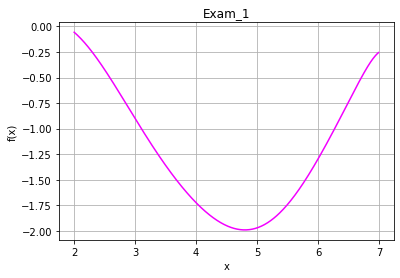

Coefficient:
[ 0.00000000e+00  8.04106335e-01  1.85083657e-01  2.58069684e-02
 -1.74110463e-01 -1.03094491e-02  4.43572548e-02 -9.44605097e-03
 -2.02180153e-03  1.16324545e-03 -2.02360058e-04  1.62020987e-05
 -5.08032319e-07]

Intercept:
-1.0284435615011407


In [11]:
#Function Found!!! x = (2, 7)

plt.title("Exam_1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y, color="#F300FF")
plt.grid()
plt.show()

print("Coefficient:")
print(f"{coef}\n")

print("Intercept:")
print(f"{intercept}")